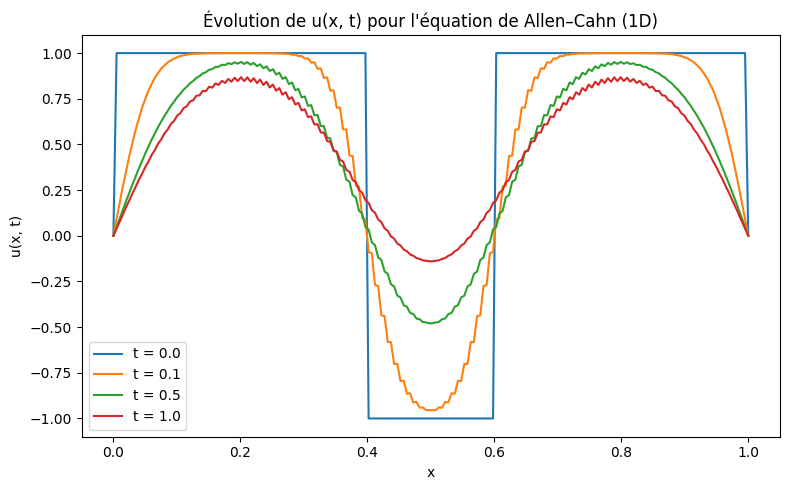

In [9]:
import numpy as np
import matplotlib.pyplot as plt

eps = 1e-2
Nx = 200
dx = 1.0 / (Nx - 1)
dt = 0.5 * dx**2 / eps
T = 1.0
t_aff = [0.0, 0.1, 0.5, 1.0]

x = np.linspace(0, 1, Nx)

# Condition initiale
u = np.ones_like(x)
u[(x >= 0.4) & (x <= 0.6)] = -1.0
u[0] = u[-1] = 0
solutions = {0.0: u.copy()}

t_ordre = sorted(t_aff)
indexSuivant = 1

Nt = int(np.ceil(T / dt))
t_actuel = 0.0
for n in range(1, Nt + 1):
    u_xx = np.zeros_like(u)
    u_xx[1:-1] = (u[2:] - 2*u[1:-1] + u[:-2]) / dx**2
    u[1:-1] = u[1:-1] + dt * (eps * u_xx[1:-1] - (u[1:-1]**3 - u[1:-1]))
    u[0] = 0
    u[-1] = 0
    t_actuel += dt
    while indexSuivant < len(t_ordre) and t_actuel >= t_ordre[indexSuivant]:
        solutions[t_ordre[indexSuivant]] = u.copy()
        indexSuivant += 1
# Pour générer la courbe
solutions[T] = u.copy()
plt.figure(figsize=(8, 5))
for t_plot in t_aff:
    plt.plot(x, solutions[t_plot], label=f"t = {t_plot:.1f}")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.title("Évolution de u(x, t) pour l'équation de Allen–Cahn (1D)")
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
eps = 1e-2
Nx = 200
dx = 1.0 / (Nx - 1)
dt = 0.5 * dx**2 / eps
T = 1.0
t_aff = [0.0, 0.1, 0.5, 1.0]

x = np.linspace(0, 1, Nx)
u = np.ones_like(x)
u[(x >= 0.4) & (x <= 0.6)] = -1.0

# Conditions aux limites
u[0] = 0
u[-1] = 0
solutions = {t: None for t in t_aff}
solutions[0.0] = u.copy()
Nt = int(np.ceil(T / dt))
t_actuel = 0.0
indexSuivant = 1
for n in range(1, Nt + 1):
    # Calcul du Laplacien discrétisé
    u_xx = np.zeros_like(u)
    u_xx[1:-1] = (u[2:] - 2*u[1:-1] + u[:-2]) / dx**2
    u[1:-1] = u[1:-1] + dt * (eps * u_xx[1:-1] - (u[1:-1]**3 - u[1:-1]))
    u[0] = 0
    u[-1] = 0
    t_actuel += dt
    while indexSuivant < len(t_aff) and t_actuel >= t_aff[indexSuivant]:
        solutions[t_aff[indexSuivant]] = u.copy()
        indexSuivant += 1

for t in t_aff:
    plt.figure(figsize=(6, 4))
    plt.plot(x, solutions[t], label=f"t = {t}")
    plt.xlabel("x")
    plt.ylabel("u(x, t)")
    plt.title(f"Coalescence 1D, t = {t}")
    plt.legend()
    plt.tight_layout()
    nomFichier = f"coalescence_t{int(t*100):02d}.png"
    plt.savefig(nomFichier)
    plt.close()
    print(f"Enregistré {nomFichier}")

Enregistré coalescence_t00.png
Enregistré coalescence_t10.png
Enregistré coalescence_t50.png
Enregistré coalescence_t100.png


In [13]:
eps = 5e-3
Nx = 200
dx = 1.0 / (Nx - 1)
dt = 0.25 * dx**2 / eps
T = 1.0
t_aff = [0.0, 0.2, 0.5, 1.0]
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Nx)
X, Y = np.meshgrid(x, y)
r0 = 0.3
u = np.tanh((np.sqrt((X - 0.5)**2 + (Y - 0.5)**2) - r0) / np.sqrt(2 * eps))
u[0, :] = u[-1, :] = u[:, 0] = u[:, -1] = 0
solutions = {t: None for t in t_aff}
solutions[0.0] = u.copy()
Nt = int(np.ceil(T / dt))
tActuel = 0.0
indexSuivant = 1
for n in range(1, Nt+1):
    u_xx = (u[2:, 1:-1] - 2*u[1:-1, 1:-1] + u[:-2, 1:-1]) / dx**2
    u_yy = (u[1:-1, 2:] - 2*u[1:-1, 1:-1] + u[1:-1, :-2]) / dx**2
    u_nv = u.copy()
    u_nv[1:-1, 1:-1] = (u[1:-1, 1:-1]
                        + dt * (eps * (u_xx + u_yy)
                                - (u[1:-1, 1:-1]**3 - u[1:-1, 1:-1])))
    # Conditions aux limites
    u_nv[0, :] = u_nv[-1, :] = u_nv[:, 0] = u_nv[:, -1] = 0
    u = u_nv

    tActuel += dt
    # Sauvegarde
    while indexSuivant < len(t_aff) and tActuel >= t_aff[indexSuivant]:
        solutions[t_aff[indexSuivant]] = u.copy()
        indexSuivant += 1
    if indexSuivant >= len(t_aff):
        break

# Sauvegarde et affichage des figures
for t in t_aff:
    plt.figure(figsize=(5,5))
    plt.imshow(solutions[t], origin='lower', extent=[0,1,0,1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f"Évolution goutte 2D, t = {t}")
    plt.tight_layout()
    nomFichier = f"goutte_t{int(t*100):02d}.png"
    plt.savefig(nomFichier)
    plt.close()
    print(f"Enregistré {nomFichier}")


Enregistré goutte_t00.png
Enregistré goutte_t20.png
Enregistré goutte_t50.png
Enregistré goutte_t100.png


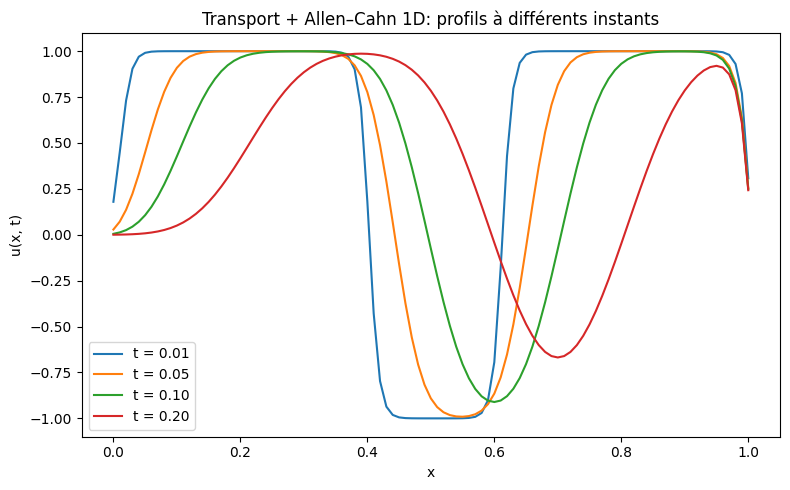

In [14]:
eps = 1e-2
v = 1.0
Nx = 101
dx = 1.0 / (Nx - 1)
dt = 0.4 * dx
T = 0.2
t_aff = [0.01, 0.05, 0.1, 0.2]

x = np.linspace(0, 1, Nx)

u = np.ones_like(x)
u[(x >= 0.4) & (x <= 0.6)] = -1.0
u[0] = u[-1] = 0
solutions = {0.0: u.copy()}
diag_p = np.ones(Nx) + 2 * eps * dt / dx**2
diag_a = -eps * dt / dx**2 * np.ones(Nx-1)

def thomas(a, b, c, d):
    n = len(b)
    c_prime = np.zeros(n-1)
    d_prime = np.zeros(n)
    c_prime[0] = c[0] / b[0]
    d_prime[0] = d[0] / b[0]
    for i in range(1, n-1):
        denom = b[i] - a[i-1] * c_prime[i-1]
        c_prime[i] = c[i] / denom
        d_prime[i] = (d[i] - a[i-1] * d_prime[i-1]) / denom
    d_prime[-1] = (d[-1] - a[-2] * d_prime[-2]) / (b[-1] - a[-2] * c_prime[-2])
    x_sol = np.zeros(n)
    x_sol[-1] = d_prime[-1]
    for i in range(n-2, -1, -1):
        x_sol[i] = d_prime[i] - c_prime[i] * x_sol[i+1]
    return x_sol

u_ancien = u.copy()
t_actuel = 0.0
solutions = {}

t_suivant = sorted(t_aff)
indexSuivant = 0

Nt = int(np.ceil(T / dt))
for _ in range(Nt+1):
    if indexSuivant < len(t_suivant) and t_actuel >= t_suivant[indexSuivant] - dt/2:
        solutions[t_suivant[indexSuivant]] = u_ancien.copy()
        indexSuivant += 1
    trans = np.zeros_like(u_ancien)
    trans[1:] = -v * (u_ancien[1:] - u_ancien[:-1]) / dx
    rhs = u_ancien + dt * trans
    d = rhs + dt * (u_ancien**3 - u_ancien)

    # Appliquer conditions Dirichlet
    b = diag_p.copy()
    a = diag_a.copy()
    c = diag_a.copy()
    d[0] = d[-1] = 0
    b[0] = b[-1] = 1.0

    u_new = thomas(a, b, c, d)
    u_ancien = u_new.copy()
    t_actuel += dt

plt.figure(figsize=(8, 5))
for t in t_aff:
    plt.plot(x, solutions[t], label=f"t = {t:.2f}")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.title("Transport + Allen–Cahn 1D: profils à différents instants")
plt.legend()
plt.tight_layout()
plt.savefig("transport1d_profiles.png")
plt.show()